***LOAD DATA***

In [181]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [182]:
paper = pd.read_csv('/Users/anhhung/Desktop/TaiLieu/DPL/r_p_s/RPS/processed_paper.csv')
rock = pd.read_csv('/Users/anhhung/Desktop/TaiLieu/DPL/r_p_s/RPS/processed_rock.csv')
scissors = pd.read_csv('/Users/anhhung/Desktop/TaiLieu/DPL/r_p_s/RPS/processed_scissors.csv')

In [183]:
paper.shape, rock.shape, scissors.shape

((1000, 43), (1000, 43), (1000, 43))

In [184]:
# Calculate the number of rows for each dataset
num_paper = len(paper)
num_rock = len(rock)
num_scissors = len(scissors)

# Calculate the row indices for train, validation, and test datasets
train_end = int(0.7 * num_paper)
val_end = train_end + int(0.15 * num_paper)

# Create the train dataset
train_paper = paper.iloc[:train_end].copy(deep=True)
train_rock = rock.iloc[:train_end].copy(deep=True)
train_scissors = scissors.iloc[:train_end].copy(deep=True)
train = pd.concat([train_paper, train_rock, train_scissors], ignore_index=True)
train.columns = train.columns.str.strip()  # Remove whitespaces from column names

# Create the validation dataset
val_paper = paper.iloc[train_end:val_end].copy(deep=True)
val_rock = rock.iloc[train_end:val_end].copy(deep=True)
val_scissors = scissors.iloc[train_end:val_end].copy(deep=True)
validation = pd.concat([val_paper, val_rock, val_scissors], ignore_index=True)
validation.columns = validation.columns.str.strip()  # Remove whitespaces from column names

# Create the test dataset
test_paper = paper.iloc[val_end:].copy(deep=True)
test_rock = rock.iloc[val_end:].copy(deep=True)
test_scissors = scissors.iloc[val_end:].copy(deep=True)
test = pd.concat([test_paper, test_rock, test_scissors], ignore_index=True)
test.columns = test.columns.str.strip()  # Remove whitespaces from column names


In [185]:
train.shape, validation.shape, test.shape

((2100, 43), (450, 43), (450, 43))

In [186]:
train

,label,x0,y0,x1,y1,x2,y2,x3,y3,x4,...,x16,y16,x17,y17,x18,y18,x19,y19,x20,y20
0,1,0.0,0.0,-0.04391,-0.07605,-0.06965,-0.17163,-0.08173,-0.25586,-0.07781,...,0.01529,-0.48103,0.04268,-0.23287,0.04651,-0.31335,0.04596,-0.36415,0.04206,-0.40832
1,1,0.0,0.0,-0.04375,-0.07382,-0.07163,-0.16603,-0.07991,-0.24654,-0.07361,...,0.00828,-0.46562,0.04098,-0.23041,0.04540,-0.30657,0.04357,-0.35543,0.03737,-0.39677
2,1,0.0,0.0,-0.04189,-0.07193,-0.06701,-0.16212,-0.07436,-0.24351,-0.06640,...,0.00967,-0.45671,0.04517,-0.21774,0.05027,-0.29446,0.04908,-0.34352,0.04383,-0.38670
3,1,0.0,0.0,-0.04182,-0.06548,-0.06674,-0.15181,-0.07563,-0.23570,-0.06202,...,0.01812,-0.44013,0.04562,-0.20845,0.05011,-0.28277,0.04845,-0.33131,0.04392,-0.37646
4,1,0.0,0.0,-0.04219,-0.06163,-0.06619,-0.14876,-0.07370,-0.23198,-0.06033,...,0.02039,-0.43696,0.04704,-0.21059,0.05126,-0.28496,0.04803,-0.33288,0.04139,-0.37651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,3,0.0,0.0,-0.01272,-0.09221,-0.01014,-0.17403,0.00416,-0.22727,0.03030,...,0.00304,-0.14914,0.09290,-0.08401,0.04133,-0.12931,0.01183,-0.12458,-0.00048,-0.10903
2096,3,0.0,0.0,-0.01347,-0.10187,-0.00949,-0.18098,0.00357,-0.23131,0.02669,...,-0.00088,-0.16459,0.08462,-0.07887,0.03655,-0.13460,0.00701,-0.13872,-0.00736,-0.12919
2097,3,0.0,0.0,-0.01177,-0.11065,-0.00358,-0.19374,0.00721,-0.24341,0.02790,...,0.00313,-0.18164,0.07841,-0.07075,0.02835,-0.14473,0.00124,-0.14865,-0.00883,-0.13504
2098,3,0.0,0.0,-0.01205,-0.11416,-0.00080,-0.19612,0.01124,-0.24323,0.03295,...,0.00840,-0.18130,0.07819,-0.07209,0.03177,-0.15295,0.00461,-0.15896,-0.00485,-0.14300


In [187]:
train = train.sample(frac=1).reset_index(drop=True)
train.head()

,label,x0,y0,x1,y1,x2,y2,x3,y3,x4,...,x16,y16,x17,y17,x18,y18,x19,y19,x20,y20
0,2,0.0,0.0,-0.04676,-0.12073,-0.07112,-0.22637,-0.08061,-0.30746,-0.04958,...,-0.00680,-0.15388,0.09380,-0.13585,0.01052,-0.14580,-0.00564,-0.11154,0.00877,-0.09542
1,2,0.0,0.0,-0.03479,-0.09617,-0.04947,-0.20295,-0.04881,-0.28465,-0.01825,...,0.01027,-0.16605,0.09947,-0.15857,0.03371,-0.19321,0.00766,-0.15170,0.01782,-0.12536
2,1,0.0,0.0,-0.04800,0.03517,-0.10342,0.04219,-0.15174,0.02952,-0.19543,...,-0.16167,-0.35696,-0.04133,-0.22111,-0.06618,-0.28709,-0.08307,-0.32863,-0.10140,-0.37019
3,2,0.0,0.0,-0.04059,-0.07843,-0.06263,-0.18084,-0.06630,-0.26318,-0.03284,...,0.01049,-0.16563,0.08774,-0.18503,0.03541,-0.19730,0.01254,-0.14742,0.02669,-0.13171
4,1,0.0,0.0,-0.05377,-0.01404,-0.10253,-0.06592,-0.13666,-0.12438,-0.17113,...,-0.03964,-0.48607,0.02705,-0.23951,0.02882,-0.32479,0.02541,-0.38111,0.01747,-0.43459


In [188]:
X_train = train[[feat for feat in train.columns if feat != 'label']].copy(deep=True)
X_train.reset_index(drop=True, inplace=True)

X_val = validation[[feat for feat in validation.columns if feat != 'label']].copy(deep=True)
X_val.reset_index(drop=True, inplace=True)

X_test = test[[feat for feat in test.columns if feat != 'label']].copy(deep=True)
X_test.reset_index(drop=True, inplace=True)

y_train = train['label']
y_val = validation['label']
y_test = test['label']

In [189]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

print(y_train.shape)
print(y_val.shape)
print(y_test.shape)


(2100, 42)
(450, 42)
(450, 42)
(2100,)
(450,)
(450,)


In [190]:
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Convert target values to zero-based indices
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# One-hot encode the target values
y_train_encoded = to_categorical(y_train_encoded, num_classes=3)
y_val_encoded = to_categorical(y_val_encoded, num_classes=3)
y_test_encoded = to_categorical(y_test_encoded, num_classes=3)

In [191]:
X_train = X_train.values
X_val = X_val.values
X_test = X_test.values


In [192]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

print(y_train_encoded.shape)
print(y_val_encoded.shape)
print(y_test_encoded.shape)


(2100, 42)
(450, 42)
(450, 42)
(2100, 3)
(450, 3)
(450, 3)


***MODEL***

In [193]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense
import tensorflow as tf
import keras

In [194]:
# Create the model
model = Sequential()

# Add layers to the model
model.add(Dropout(0.5, input_shape=(42,)))
model.add(Dense(20, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='relu'))
model.add(Dense(3, activation='softmax'))

# Print the model summary
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_14 (Dropout)        (None, 42)                0         
                                                                 
 dense_21 (Dense)            (None, 20)                860       
                                                                 
 dropout_15 (Dropout)        (None, 20)                0         
                                                                 
 dense_22 (Dense)            (None, 10)                210       
                                                                 
 dense_23 (Dense)            (None, 3)                 33        
                                                                 
Total params: 1,103
Trainable params: 1,103
Non-trainable params: 0
_________________________________________________________________


In [195]:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=10000,
    decay_rate=0.95,
    staircase=True
)

model.compile(optimizer=tf.optimizers.Adam(learning_rate=lr_schedule), loss='categorical_crossentropy', metrics=["accuracy"])


In [196]:
# Define the LearningRateScheduler callback
lr_callback = tf.keras.callbacks.LearningRateScheduler(lambda epoch: lr_schedule(epoch).numpy())
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [197]:
history = model.fit(X_train, y_train_encoded, epochs= 100, batch_size=8, validation_data=(X_val, y_val_encoded), callbacks=[lr_callback, es_callback])


Epoch 1/100
263/263 [==============================] - 2s 3ms/step - loss: 1.0728 - accuracy: 0.4157 - val_loss: 0.9874 - val_accuracy: 0.9133 - lr: 0.0010
Epoch 2/100
263/263 [==============================] - 1s 2ms/step - loss: 0.9604 - accuracy: 0.5471 - val_loss: 0.8029 - val_accuracy: 0.8689 - lr: 0.0010
Epoch 3/100
263/263 [==============================] - 1s 2ms/step - loss: 0.8294 - accuracy: 0.6352 - val_loss: 0.6289 - val_accuracy: 0.8578 - lr: 0.0010
Epoch 4/100
263/263 [==============================] - 1s 2ms/step - loss: 0.7177 - accuracy: 0.6986 - val_loss: 0.5042 - val_accuracy: 0.8711 - lr: 0.0010
Epoch 5/100
263/263 [==============================] - 0s 2ms/step - loss: 0.6415 - accuracy: 0.7367 - val_loss: 0.4590 - val_accuracy: 0.8844 - lr: 0.0010
Epoch 6/100
263/263 [==============================] - 0s 2ms/step - loss: 0.5530 - accuracy: 0.7805 - val_loss: 0.4641 - val_accuracy: 0.8533 - lr: 0.0010
Epoch 7/100
263/263 [==============================] - 0s 2ms/st

In [198]:
model.save('model1.h5')

In [199]:
import matplotlib.pyplot as plt

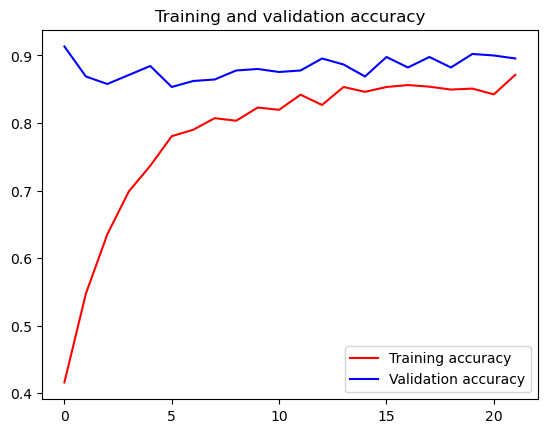

<Figure size 640x480 with 0 Axes>

In [200]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [201]:
test_loss, test_acc = model.evaluate(X_test, y_test_encoded)

print('Test accuracy:', test_acc)

15/15 [==============================] - 0s 1ms/step - loss: 0.0820 - accuracy: 0.9933
Test accuracy: 0.9933333396911621
